In [1]:
# Hand written digit recognition 

In [98]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
import cv2
import tensorflow as tf
import glob
import time




In [89]:
# load the data and split to train and test dataset

In [90]:
(X_train, Y_train),(X_test,Y_test) = mnist.load_data()

In [91]:

print(X_train.shape)
print(X_test.shape)


(60000, 28, 28)
(10000, 28, 28)


In [92]:
#sample image
print(X_train[444])
print(Y_train[444])


[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  14 116 137 251 178  15   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  33 229 254 254 254 254 219  11   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 110 254 169  83  86 231 254 169  13   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  14 121  12   0   0 110 254 254  92   

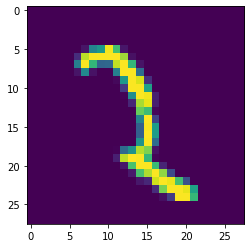

In [93]:
# show the image a picture
plt.imshow(X_train[444])


In [94]:
# reshape the data to fit the model

X_train = X_train.reshape(60000,28,28,1)     # 1 the depth of the grascale
X_test = X_test.reshape(10000,28,28,1)

X_train.shape


(60000, 28, 28, 1)

In [95]:
# encoding the target set
y_test_Encode = to_categorical(Y_test)
y_train_Encode = to_categorical(Y_train)

y_train_Encode.shape

(60000, 10)

In [96]:
# new label
y_train_Encode[444]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [99]:
# load model

model = keras.models.load_model('/Users/nitin/Desktop/handWrittenModel')


In [11]:
# create the model CNN

In [131]:
model = Sequential()

#add model layers

# first layer
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))      # relu= rectified linear unit

# second layer
model.add(Conv2D(32, kernel_size=3, activation='relu'))

# third layer
model.add(Conv2D(32, kernel_size=3, activation='relu'))

# connected layer
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 26, 26, 64)        640       
                                                                 
 conv2d_15 (Conv2D)          (None, 24, 24, 32)        18464     
                                                                 
 conv2d_16 (Conv2D)          (None, 22, 22, 32)        9248      
                                                                 
 flatten_4 (Flatten)         (None, 15488)             0         
                                                                 
 dense_4 (Dense)             (None, 10)                154890    
                                                                 
Total params: 183,242
Trainable params: 183,242
Non-trainable params: 0
_________________________________________________________________


In [132]:
# compile the model
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

In [133]:
# train the model
hist = model.fit(X_train,y_train_Encode, validation_data=(X_test,y_test_Encode),epochs=5)   #epochs is the numer of iterations

Epoch 1/5
1875/1875 [==============================] - 199s 106ms/step - loss: 0.2263 - accuracy: 0.9574 - val_loss: 0.0729 - val_accuracy: 0.9763
Epoch 2/5
1875/1875 [==============================] - 187s 100ms/step - loss: 0.0556 - accuracy: 0.9830 - val_loss: 0.0599 - val_accuracy: 0.9813
Epoch 3/5
1875/1875 [==============================] - 192s 102ms/step - loss: 0.0404 - accuracy: 0.9877 - val_loss: 0.0566 - val_accuracy: 0.9828
Epoch 4/5
1875/1875 [==============================] - 190s 101ms/step - loss: 0.0316 - accuracy: 0.9904 - val_loss: 0.0675 - val_accuracy: 0.9798
Epoch 5/5
1875/1875 [==============================] - 178s 95ms/step - loss: 0.0263 - accuracy: 0.9918 - val_loss: 0.0687 - val_accuracy: 0.9833


In [134]:
# saving the model 
model.save("/Users/nitin/Desktop/handWrittenModel/")

INFO:tensorflow:Assets written to: /Users/nitin/Desktop/handWrittenModel/assets


<function matplotlib.pyplot.show(close=None, block=None)>

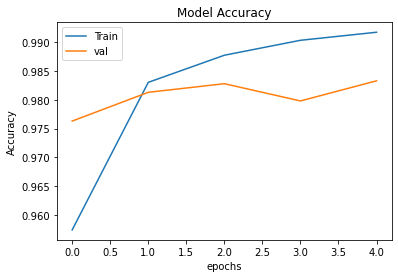

In [135]:
# accuracy of the model
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epochs')
plt.legend(['Train', 'val'], loc='upper left')
plt.show

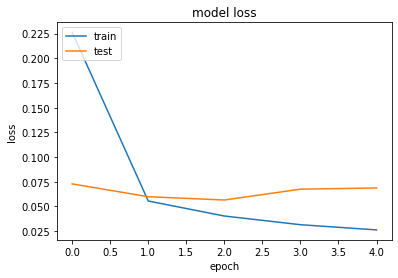

In [136]:
# plot the loss of the model

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [137]:
# show predictions 
predictions = model.predict(X_test[:4])
predictions

array([[7.39330430e-10, 3.49751339e-15, 5.68887604e-10, 9.96752569e-10,
        3.69213615e-16, 9.50461176e-16, 2.42158563e-22, 1.00000000e+00,
        6.36297059e-13, 3.28736094e-10],
       [1.07367422e-08, 3.56889700e-08, 1.00000000e+00, 2.32107578e-09,
        1.34706868e-09, 1.10113721e-16, 4.55511291e-08, 1.05111903e-13,
        2.36116549e-08, 1.44278139e-16],
       [9.25656704e-11, 9.99985576e-01, 2.72116618e-09, 2.03720332e-10,
        1.40443635e-05, 2.97106713e-08, 1.71531811e-09, 2.78909965e-07,
        8.67875301e-08, 1.13644283e-09],
       [9.99999523e-01, 4.47046879e-15, 1.26360959e-07, 2.20703594e-11,
        1.96809036e-09, 1.87654961e-10, 2.14305530e-07, 5.83633211e-11,
        6.06533018e-11, 8.46022061e-08]], dtype=float32)

In [138]:
#print predictions as number label for the first four images

print(np.argmax(predictions, axis=1))    # armax will return the highest value from the array

# print the actual number
print(Y_test[:4])

[7 2 1 0]
[7 2 1 0]


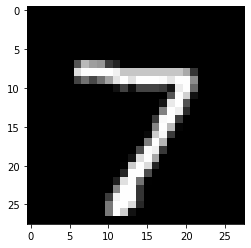

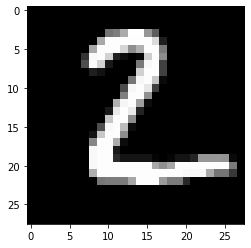

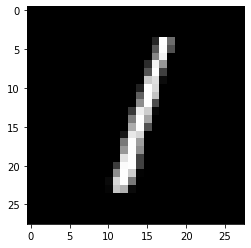

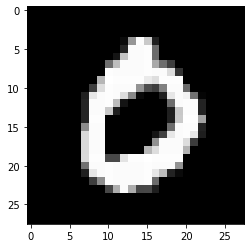

In [139]:
# display the first four images

for i in range(0,4):
  image = X_test[i]
  image = np.array(image, dtype='float')
  pixels = image.reshape((28,28))
  plt.imshow(pixels, cmap='gray')
  plt.show()


# New Section

(370, 389, 3)
(370, 389)
(28, 28)
784
0


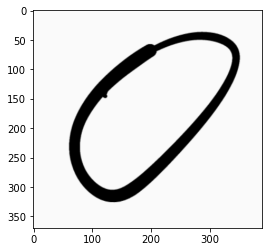

In [140]:

#/content/train_39_02986.png

imge = cv2.imread('/Users/nitin/Desktop/handwrittendigits/0_8.png') 

print(imge.shape)
plt.imshow(imge)
gray = cv2.cvtColor(imge, cv2.COLOR_BGR2GRAY)
print(gray.shape)

resized = cv2.resize(gray, (28,28), interpolation=cv2.INTER_AREA)
print(resized.shape)
print(resized.size)

imge = np.invert(np.array(resized))     ##invert black to white in images so that model wont get confues
pixels = imge.reshape((-1,28,28,1))
prdct = model.predict(pixels)

print(np.argmax(prdct))    


In [141]:

def predictImg(img):
    
    imge = cv2.imread(img) 

    #print(imge.shape)
    gray = cv2.cvtColor(imge, cv2.COLOR_BGR2GRAY)
    
    #print(gray.shape)

    resized = cv2.resize(gray, (28,28), interpolation=cv2.INTER_AREA)
    
    #print(resized.shape)
    #print(resized.size)

    imge = np.invert(np.array(resized))     ##invert black to white in images so that model wont get confues
    pixels = imge.reshape((-1,28,28,1))
    prdct = model.predict(pixels)
    
    plt.figure
    plt.imshow(imge)
    plt.show()
    print(np.argmax(prdct))
    #print(np.argmax(prdct)) 
    



In [86]:
folder = glob.glob('/Users/nitin/Desktop/handwrittendigits/*')
imagenames_list = []
for i in folder:
    imagenames_list.append(i)
    

In [102]:
#for i in imagenames_list:
 #   predictImg(i)

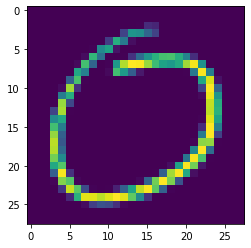

0


In [142]:
predictImg('/Users/nitin/Desktop/handwrittendigits/0_9.png')

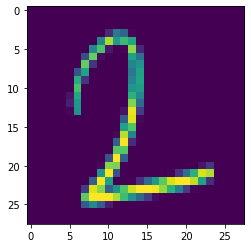

2


In [156]:
predictImg('/Users/nitin/Desktop/handwrittendigits/2_4.png')

In [117]:
# fig = plt.figure(figsize=(20,20))

# for i, img in enumerate(imagenames_list):
#     result = predictImg(img)
#     y = fig.add_subplot(7,7, i+1)
    
#     y.imshow(cv2.imread(img))
#     y.axes.get_xaxis().set_visible(False)
#     y.axes.get_yaxis().set_visible(False)
#     plt.title('prediction '+str(result))

# #plt.show()    